Import Neccesary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the dataset 

In [2]:
df=pd.read_csv('IRIS.csv')

In [3]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [5]:
X=df.iloc[:,:].values


### We have to convert the Species data to labels so that the model can understand easily 
### we can make use of LabelEncoder that does the task for us 

In [6]:
#Class 1 - Iris-setosa
#Class 2 - Iris-Versicolor
#class 3 - Iris-virginica

In [7]:
from sklearn.preprocessing import LabelEncoder
Tran=LabelEncoder()
X[:,4]=Tran.fit_transform(X[:,4])

### Next we have to find the optimal number of clusters so to succeed in finding the optimal number we can make use of Elbow method or silhouette method.Lets use Elbow method 

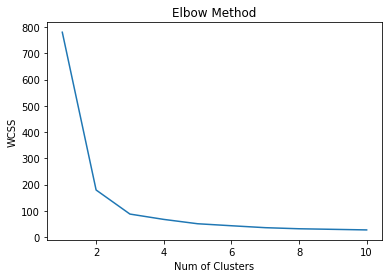

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')
plt.show()

### According to the Elbow method We can see 3 is the Optimal number of clusters so lets go with it to build our K-means model 

In [9]:
#we use kmeans++ to tackle the random initilization trap here 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) 
pred_kmeans = kmeans.fit_predict(X)

#### Its time for us to visualize those beautiful clusters that were generated by our K-means algorithm

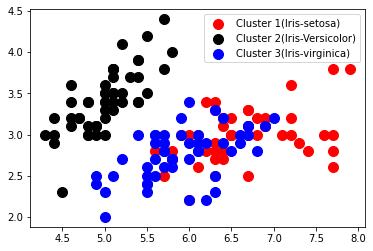

In [11]:
plt.scatter(X[pred_kmeans == 0, 0], X[pred_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1(Iris-setosa)')
plt.scatter(X[pred_kmeans == 1, 0], X[pred_kmeans == 1, 1], s = 100, c = 'black', label = 'Cluster 2(Iris-Versicolor)')
plt.scatter(X[pred_kmeans == 2, 0], X[pred_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3(Iris-virginica)')


plt.legend()
plt.show()